<a href="https://colab.research.google.com/github/PaulToronto/Stanford-Andrew-Ng-Machine-Learning-Specialization/blob/main/1_1_Introduction_to_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.1 Introduction to Machine Learning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from sklearn.linear_model import LinearRegression

## 1.1.1 Overview of Machine Learning

### 1.1.1.1 Welcome to machine learning

#### Definition: Machine learning

**Machine learning** is the science of getting computers to learn without being explicitly programmed.

### 1.1.1.2 Applications of machine learning

- ML is a sub-field of AI
- Web search
- Speech recognition
- Diagnose disease from X-rays
- Self-driving cars
- Computer vision
- Augmented reality
- Manufacturing
- Large-scale agriculture
- Health care
- E-commerce
- AGI - Artificial General Intelligence, still a long way from that goal

## 1.1.2 Supervised vs Unsupervised Machine Learning

### 1.1.2.1 What is machine learning

#### Definition: Machine Learning

Field of study that gives computers the ability to learn without being explicitly programmed.

~ Arthur Samuel (1959)

#### Machine Learning Algorithms

1. Supervised learning
    - used most in real-world applications
    - has seen the most rapid advancements and innovations
    - the topic of the first two courses in this specialization
2. Unsupervised learning
    - covered along with recommender systems and reinforcement learning in the third course of this specialization
3. Recommender systems
4. Reinforcement learning

### 1.1.2.2 Supervised learning part 1

- $x \implies y$ 
- $\text{input} \implies \text{output label}$
- the learning algorithm learns from being given the "right answers"
- the "right answer" is the correct **label** $y$ for a given input $x$
- when the algorithm is trained it can predict the **label** given $x$


#### **Example Application**: $x \implies y$

- **Spam Filter**: $\text{email} \implies \text{spam? (0/1)}$
- **Speach Recognition**: $\text{audio} \implies \text{text transcript}$
- **Machine Translation**: $\text{English} \implies \text{Spanish}$
- **Online Advertising**: $\text{ad, user, info} \implies \text{click? (0/1)}$
- **Self-driving Car**: $\text{image, radar info} \implies \text{position of other cars}$
- **Visual Inspection**: $\text{image of phone} \implies \text{defect? (0/1)}$


#### Regression: Housing Price Prediction

- Is it better to fit this data with a line or a curve? Later in the course we will learn how to make that decision
- The red X's are the labels, the actual price
- **Regression** is a particular type of supervised learning
    - Predict a number when there are infinitely many possible outputs

<img src='https://drive.google.com/uc?export=view&id=1GYfWx1zMlGjAJ_Stjwmknh1Z9bZu6sml'>

<img src='https://drive.google.com/uc?export=view&id=1DbI1h5dV_FnbBgOXosZaWEamqwBPSVxg'>

<img src='https://drive.google.com/uc?export=view&id=14lRdkNuT-3pN9u8bDAca-pOs7B2dxCQa'> 

### 1.1.2.3 Supervised learning part 2

#### Classification Example: Breast cancer detection

A classsification problem with two possible output categories:

$\text{tumor size} \implies \text{diagnosis benign or malignant? (0/1)}$

<img src='https://drive.google.com/uc?export=view&id=1GZIr1Uty7GDvA_erhsIYgqB_h0Sc6ul8'>

A classification problem can also have more than just two possible output categories:

<img src='https://drive.google.com/uc?export=view&id=19j2-p29yJh8XwEg22S-iDCWWsF5rfulP'>

**NOTE**: For classification, the terms **output class** and **output category** are used interchangeably. 

<img src='https://drive.google.com/uc?export=view&id=1bUXYmVKZiQWDd_NZTSyw-8To0I6D9wMc'> 

In the above example, the learning algorithm has to decide how to fit a **boundary line** through this data.



#### Types of supervised learning

1. Regression 
    - to predict a number
    - infinitely many possible outputs
2. Classification
    - to predict a category
    - categories can be numbers, but they don't have to be
    - small number of possible output categories


### 1.1.2.4 Unsupervised learning part 1

<img src='https://drive.google.com/uc?export=view&id=1-4_Y5Wt525WhqNGmDKN82ocTQpgtFQ7Q'> 

- the goal of unsupervised learning is to find something interesting in **unlabeled** data.
- an unsupervised learning algorithm might decide that the data can be assigned to two different clusters
    - this is a particular type of unsupervised learning called a **clustering algorithm**

#### Clustering Examples

1. Google News
    - articles are clustered
    - no predetermined key words are known
2. DNA microarray
    - <img src='https://drive.google.com/uc?export=view&id=1fgb3VY9I6fX-kaSMaaCTNOXeWdAgm-QM'> 
    - use this data to cluster individuals into different categories
3. Grouping customers
    - many companies have huge databases of customer information
        - this data can be used to cluster customers into different market segments

### 1.1.2.5 Unsupervised learning part 2

#### Definition: Unsupervised learning

Data only comes with imput $x$, but not output labels $y$. The algorithm has to find **structure** in the data.

#### Three types of Unsupervised Learning covered in this specialization

1. Clustering
    - Group similar data points together
2. Anomaly detection
    - Find unusual data points
        - important for fraud detection
3. Dimensionality reduction
    - Compress data using fewer numbers while losing as little information as possible

## 1.1.3 Regression Model

### 1.1.3.1 Linear regression model part 1

#### Portland Data

In [2]:
path = 'https://raw.githubusercontent.com/PaulToronto'
path += '/Stanford-Andrew-Ng-Machine-Learning-Specialization/main'
path += '/data/Portland.csv'

portland = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
#portland['Price'] = portland['Price'] / 1000.0
portland.head()

,Size,Bedrooms,Price
0,2104,3,399.9
1,1600,3,329.9
2,2400,3,369.0
3,1416,2,232.0
4,3000,4,539.9


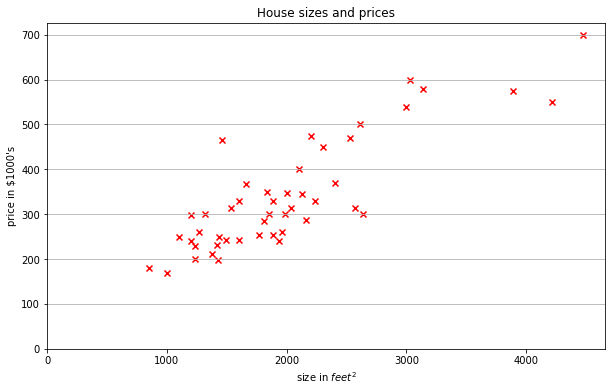

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(portland['Size'], 
            portland['Price'],
            marker='x', 
            color='red');
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.grid(axis='y')
plt.title('House sizes and prices')
plt.xlabel('size in ${feet}^2$')
plt.ylabel("price in $1000's")
 
plt.show()

In [4]:
X = portland[['Size']]
y = portland['Price']

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [5]:
model.intercept_, model.coef_

(71.2704924487291, array([0.13452529]))

In [6]:
fitted = model.predict(X)

In [7]:
size_1250_predict = model.intercept_ + 1250 * model.coef_[0]
size_1250_predict

239.42710209903078

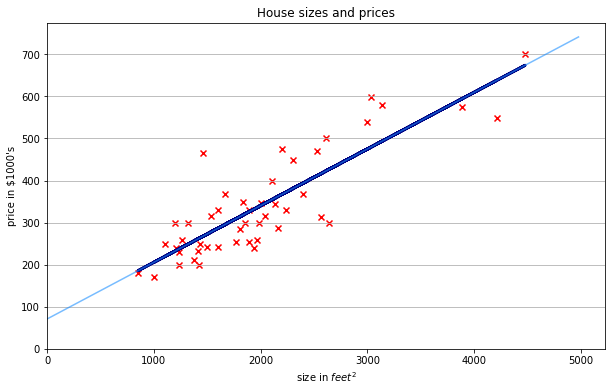

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(X, 
            y,
            marker='x', 
            color='red');

# regression line - two ways
house_size = np.linspace(0, portland['Size'].max() + 500)
plt.plot(portland['Size'], fitted, color='navy', linewidth=3)
plt.plot(house_size, 
         model.intercept_ + house_size * model.coef_[0],
         color='dodgerblue', alpha=0.6)

plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.grid(axis='y')
plt.title('House sizes and prices')
plt.xlabel('size in ${feet}^2$')
plt.ylabel("price in $1000's")
 
plt.show()

#### Terminology

- **Training set**: data that is used to train a model
- $x$ is the input variable, aka *feature*
- $y$ is the output variable, aka *target variable*
- $m$ is the total number of training examples (rows)
- $(x, y)$ denotes a single training example
- $(x^{(i)}, y^{(i)})$ denotes the $i^{th}$ training example
- $w$ is the **weight** parameter
- $b$ is the **bias** parameter
- $f_{w,b}\left(x^{(i)}\right)$ is the result of the model evaluation at $x^{(i)}$ parameterized by $w,b$
    - $f_{w,b}\left(x^{(i)}\right) = wx^{(i)} + b$
- $a$ is a scalar
- $\textbf{a}$ is a vector

### 1.1.3.2 Linear regression model part 2

#### What does a supervised learning algorithm do with a dataset? 

- Input: training set
    - features
    - targets
- Output: function, $f$
    - historically, this function used to be called a **hypothesis**
    - the job of $f$ is to take a new input, $x$ and output an estimate or prediction for $\hat{y}$
    - $\hat{y}$ is the estimate or prediction for $y$
    - $y$ is the actual data value in the training set, aka the **target**
    - the function, $f$ is called the **model**


#### From the Portland housing example:

$\text{size} \implies f \implies \text{estimated price}$

#### How to represent $f$? 

$f_{w,b}\left(x\right) = wx + b$

- sometimes, $w,b$ is omitted, but it means the same thing
- the name if this model is **linear regression** or more specifically, **linear regression with one variable** or **univariate linear regression**
    - in the Portland example, that one variable is the single feature: the size of the house

### 1.1.3.3 Lab: Model representation

#### Goal

The goal of this lab is to learn to implement the model $f_{w,b}$ for linear regression with one variable.

#### The data and problem statement

This lab will use a simple data set with only two data points - a house with 1000 square feet(sqft) sold for \$300,000 and a house with 2000 square feet sold for \$500,000. These two points will constitute our data or **training set**. In this lab, the units of size are 1000 sqft and the units of price are 1000s of dollars.

In [9]:
data = [[1.0, 300], [2.0, 500]]
train = pd.DataFrame(data, columns=['Size', 'Price'])
train

,Size,Price
0,1.0,300
1,2.0,500


In [10]:
x_train = np.array(train['Size'])
y_train = np.array(train['Price'])

In [11]:
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300 500]


#### Number of training examples: $m$

In [12]:
# m in the number of training examples
print(f'x_train.shape: {x_train.shape}')
m = x_train.shape[0]
print(f'The number of training examples is: {m}')

x_train.shape: (2,)
The number of training examples is: 2


In [13]:
# an alternate way to get m
m = len(x_train)
print(f'The number of training examples is: {m}')

The number of training examples is: 2


#### Training example: $x^{(i)}, y^{(i)}$

- Python is zero-index, so the first training example has index, $0$.

In [14]:
i = 0

x_i = x_train[i]
y_i = y_train[i]

print(f'(x^({i}), y^({i})) = ({x_i}, {y_i})')

(x^(0), y^(0)) = (1.0, 300)


#### Plotting the data

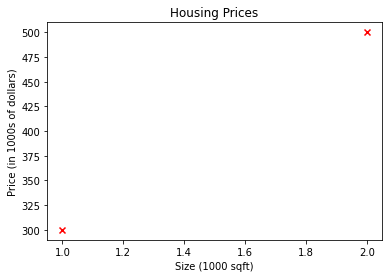

In [15]:
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title('Housing Prices')
plt.xlabel('Size (1000 sqft)')
plt.ylabel('Price (in 1000s of dollars)')
plt.show()

#### Model, function $f$

The model function for linear regression is represented as:

$
f_{w,b}\left(x^{(i)}\right) = wx^{(i)} + b
$

Different values of $w$ and $b$ represent different straight lines on the plot.

In [16]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray(m,)): Data, m examples
      w,b (scalar).  : model parameters
    Returns
      y (ndarray(m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b

    return f_wb

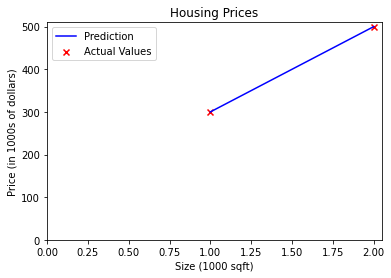

In [17]:
# w = 100; b = 100 # this is not a good estimate
w = 200; b = 100   # much better

# plot the data points
plt.scatter(x_train, y_train, marker='x', color='r', label='Actual Values')

# plot model prediction
temp_f_wb = compute_model_output(x_train, w, b)
plt.plot(x_train, temp_f_wb, c='b', label='Prediction')

plt.xlim(xmin=0)
plt.ylim(ymin=0)

# title, labels and legend
plt.title('Housing Prices')
plt.xlabel('Size (1000 sqft)')
plt.ylabel('Price (in 1000s of dollars)')
plt.legend()

plt.show()

In our model, $w = 200$ and $b = 100$. Predict the cost of a house that is 1200 sqft. 

In [18]:
w = 200
b = 100
x_i = 1200 / 1000

cost_1200sqft = w * x_i + b

print(f'The cost of a 1200 sqft house is predicted to be {cost_1200sqft:.0f} thousand dollars')

The cost of a 1200 sqft house is predicted to be 340 thousand dollars


### 1.1.3.4 Cost function formula

- Training set: has features, $x$, and output targets, $y$
- Model: $f_{w,b}\left(x\right) = wx + b$
- Model parameters: $w$ and $b$
    - these parameters are also called: *coefficients* or *weights*
- $w,b$ determine the model, $f$, as shown in the following code:

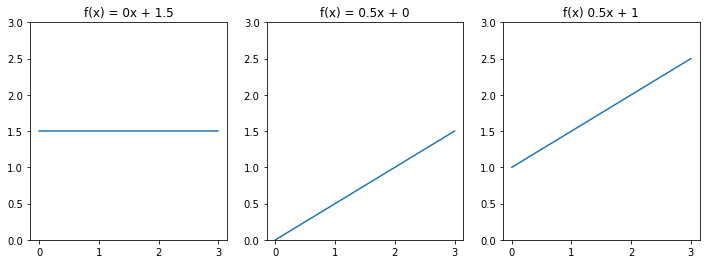

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

domain = np.array([0, 1, 2, 3])
f_wb = lambda w, b: w * domain + b

w = 0
b = 1.5
ax1.plot(domain, f_wb(w, b))
ax1.set_title('f(x) = 0x + 1.5')
ax1.set_ylim([0, 3])

w = 0.5
b = 0
ax2.plot(domain, f_wb(w, b))
ax2.set_title('f(x) = 0.5x + 0')
ax2.set_ylim([0, 3])

w = 0.5
b = 1
ax3.plot(domain, f_wb(w, b))
ax3.set_title('f(x) 0.5x + 1')
ax3.set_ylim([0, 3])

plt.show()

- Recall that the $i^{th}$ training example is represented by $\left(x^{(i)}, y^{(i)}\right)$, where $y^{(i)}$ is the target
- For a given input, $x^{(i)}$, the function, $f$, also makes a predicted value, $\hat{y}^{(i)}$
    - $\hat{y}^{(i)} = f_{w,b}\left(x^{(i)}\right) = wx^{(i)} + b$
- **Goal**: find values $w$ and $b$ so that $\hat{y}^{(i)}$ is close to $y^{(i)}$ for all $\left(x^{(i)}, y^{(i)}\right)$ 

#### Measuring how well a line fits the training data

- To do this, we need a **cost function**
- The error for the $i^{th}$ data point is $\hat{y}^{(i)} - y^{(i)}$
- We want to square this error and measure it across the entire dataset


$$
\sum_{i=1}^{m}\left(\hat{y}^{(i)} - y^{(i)}\right)^{2}
$$

- So that the cost function doesn't automatically get larger as the training set size gets larger, we take the average

$$
\frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}^{(i)} - y^{(i)}\right)^{2}
$$

- However, by convention in the ML community, the division is by $2m$ instead of $m$
    - this cost function still works and it makes later calculations cleaner
- We use $J(w,b)$ to refer to the cost function
- This function is also called the **Squared Error Cost Function**
- In ML different cost functions are used for different applications, but this cost function is the most commonly used for linear regression, and all other regression problems


$$
\begin{align}
J(w,b) &= \frac{1}{2m}\sum_{i=1}^{m}\left(\hat{y}^{(i)} - y^{(i)}\right)^{2} \\ 
&= \frac{1}{2m}\sum_{i=1}^{m}\left(f_{w,b}\left(x^{(i)}\right) - y^{(i)}\right)^{2}
\end{align}
$$

- We have still not arrived at our goal of finding values for $w$ and $b$ that minimize the cost function, but we will get there after a lecture to build intuition about what it means if $J(w,b)$ is large vs small

### 1.1.3.5 Cost function intuition